## TSML-13_HW6_Случайные_марковские_процессы

1) Скачайте текст Войны и мир (ссылка на github https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace и гугл диск https://drive.google.com/drive/u/0/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU). 
2) Очистите его, оставив только русские буквы и символы пробела. 
3) Постройте матрицу переходных вероятностей.
4) Посчитайте вероятность встретить строку из 4-х символов, которая начинается на "п", а кончается на "р". 
5) Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8 символов
6) Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. 
7) Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [38]:
import re
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from hmmlearn.hmm import GaussianHMM
from scipy.stats import boxcox
from math import sqrt

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

#### Загрузка всех томов и объединение все в 1 текст

In [5]:
with open('./data/HW6/tom_1.txt', 'r') as f:
    tom_1 = f.read().lower()

In [6]:
with open('./data/HW6/tom_2.txt', 'r') as f:
    tom_2 = f.read().lower()

In [9]:
with open('./data/HW6/tom_3.txt', 'r') as f:
    tom_3 = f.read().lower()

In [10]:
with open('./data/HW6/tom_4.txt', 'r') as f:
    tom_4 = f.read().lower()

In [11]:
tom_all = tom_1 + tom_2 + tom_3 + tom_4

In [12]:
tom_all[:300]

'annotation\n\n\nлев толстой\n\nвойна и мир\n\nтом 1\n\n\n\n\n\n* * *\n\n\n\nтом iчасть перваяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nxvi\n\nxvii\n\nxviii\n\nxix\n\nxx\n\nxxi\n\nxxii\n\nxxiii\n\nxxiv\n\nxxv\n\nxxvi\n\nxxvii\n\nxxviii\n\n\n\n\n\nчасть btораяi\n\nii\n\niii\n\niv\n\nv\n\nvi\n\nvii\n\nviii\n\nix\n\nx\n\nxi\n\nxii\n\nxiii\n\nxiv\n\nxv\n\nx'

#### Оичтска текста от "мусора". Поиск и замена на основе регулярного выражения

In [15]:
tom_all = re.sub('[^а-я\s]','', tom_all)

In [16]:
tom_all[:300]

'\n\n\nлев толстой\n\nвойна и мир\n\nтом \n\n\n\n\n\n  \n\n\n\nтом часть первая\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nчасть орая\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nчасть третья\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\nтом \n\n\nлев николаевич толстой\n\nвойна и мир\n\nтом \n\n\n\n\nчасть пе'

In [17]:
tom_all = re.sub('[\n]',' ', tom_all)

In [18]:
tom_all[:300]

'   лев толстой  война и мир  том             том часть первая                                                            часть орая                                              часть третья                                                  том    лев николаевич толстой  война и мир  том      часть пе'

In [19]:
tom_all = re.sub('[\s]+',' ', tom_all)

In [20]:
tom_all[:300]

' лев толстой война и мир том том часть первая часть орая часть третья том лев николаевич толстой война и мир том часть первая е поместья мой верный раб ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы ещ'

#### Формирование матрицы перехода вероятностей на основе руссого словоря

In [22]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [23]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [24]:
for cp, cn in zip(tom_all[:-1], tom_all[1:]):
    probabilities[POS[cp], POS[cn]] += 1

#### Подсчет переходной вероятностьи между каждой из русских букв

In [25]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

/var/folders/kw/lc33bg451gq4w3w1c0zklfdc0000gn/T/ipykernel_27817/2743358628.py:1: RuntimeWarning: invalid value encountered in divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None])


In [26]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

#### Тепловая карта с переходной вероятностью между каждой из русских букв

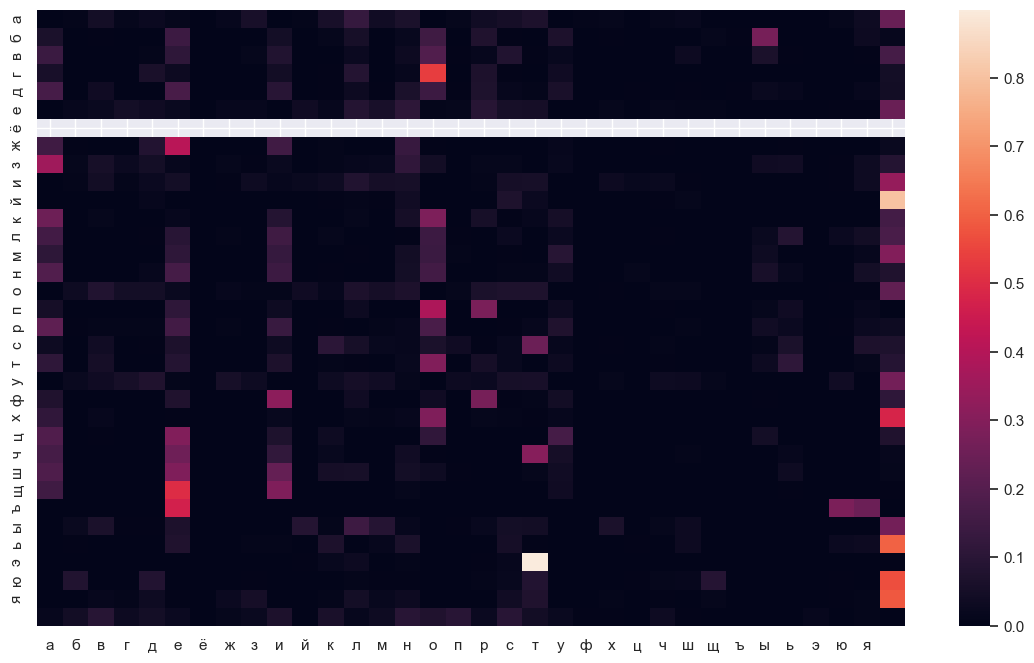

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

#### Вывод вероятности встретить строку из 4-х символов, которая начинается на "п", а кончается на "р".

In [28]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        if c1 != ' ' and c2 != ' ':
            proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end] * probabilities[end, POS[' ']]
            if proba > 0:
                print(''.join(['п', c1, c2, 'р']), proba)

паар 2.5642173934253434e-10
пабр 3.4713798907471876e-08
павр 3.954315236617169e-08
пагр 4.3966796469760655e-08
падр 1.0115292055962128e-07
паер 6.727463269766857e-08
пажр 2.5307857239564085e-10
пазр 4.1813501718749896e-08
паир 7.822733413875512e-10
пайр 8.249387919310934e-10
пакр 1.663673531721892e-07
памр 3.471644813062523e-09
панр 3.860161700688574e-09
паор 3.040384551201885e-10
папр 1.8952402497760835e-07
парр 9.05377611050778e-10
паср 1.7311848859801682e-08
патр 1.9130851200402329e-07
паур 2.314597014404742e-09
пафр 1.0951578030425606e-07
пахр 8.322888782479809e-09
пачр 8.7813338419475e-10
пашр 1.8222762416489114e-10
пащр 1.5746526561647887e-10
паэр 2.9471121546781316e-12
паюр 5.512416986890957e-09
паяр 4.814645831340327e-09
пгар 9.414062767327548e-10
пгвр 1.500382767874127e-11
пггр 1.871374933184894e-12
пгдр 1.7745833277612421e-09
пгер 1.1556512576335265e-09
пгжр 7.639047126958962e-15
пгзр 3.7250413261935125e-13
пгир 1.537216429197236e-10
пгкр 9.916078188334633e-11
пгмр 1.77278232

#### Используя матрицу переходных вероятностей, генерируется слово, начинающееся с буквы “Б” и имеющее длину 8 символов

In [29]:
s = ['б']
start = np.random.choice(list(RUSSIAN))
s.append(start)
length = 7
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

беи ркаал


#### Выбор рядв из предыдущих домашних заданий по временным рядам и оценка его через HMM. 
#### Построение (через среднее каждой компоненты) наивного прогноз ряда.

In [31]:
ser = pd.read_csv("./data/HW1_5/mean-monthly-air-temperature-deg.csv")['Deg']

#### Функция Dickey-Fuller

In [32]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

#### Функция вывода коррелограммы

In [33]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

#### Проверка ряда на стационарность с помощью теста Дики-Фуллера и построение коррелограммы

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


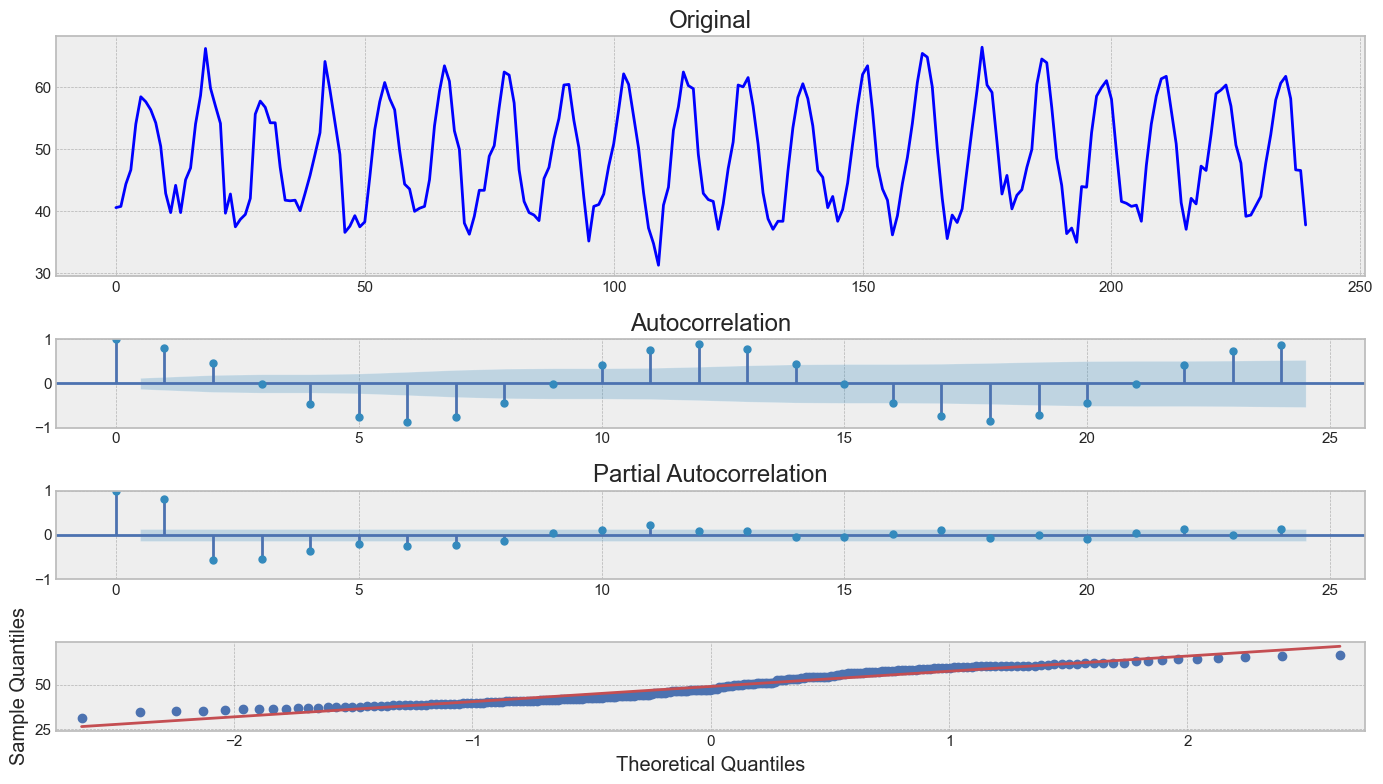

In [34]:
tsplot(ser)

#### p-value меньше 0.05
#### Присутствует сезонность
#### Ряд не стационарен


#### Применение дифференцирования с лагом 12 месяцев

In [35]:
ser = np.diff(ser, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.672894e+01
p-value                        1.388342e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


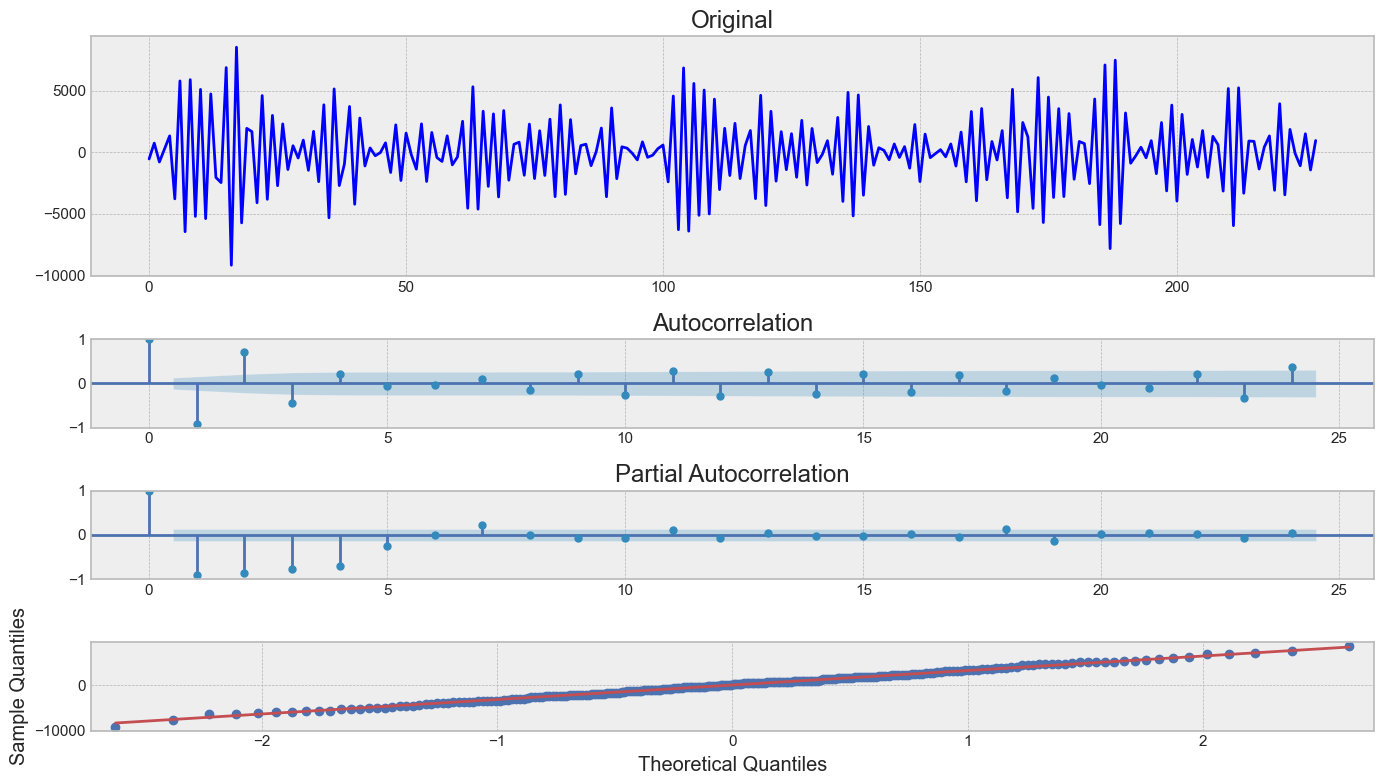

In [36]:
tsplot(ser)

#### P-value близко к нулю
#### Ушел тренд
#### Ушла сезонность
#### Ряд стал стационарным

#### Реаллизация скрытой марковскаой модели (НММ) с 13ю состояниями

In [39]:
values = ser.reshape(-1,1)

In [40]:
for n in range(1, 14):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -2163.573355459868
2 -2101.7878057708454
3 -2053.5011964825503
4 -2035.4753517237311
5 -2025.2327902364802
6 -1996.4144119595364
7 -1990.5178471057222
8 -1975.1975447394957
9 -1961.8445813034868
10 -1950.7194260905708
11 -1954.7322818184023
12 -1940.2114194424905
13 -1925.1162396701213


#### Наилучший score для 13го состояния, так как он наиболее положительный
#### Применение 13ого состояния для обучения модели НММ

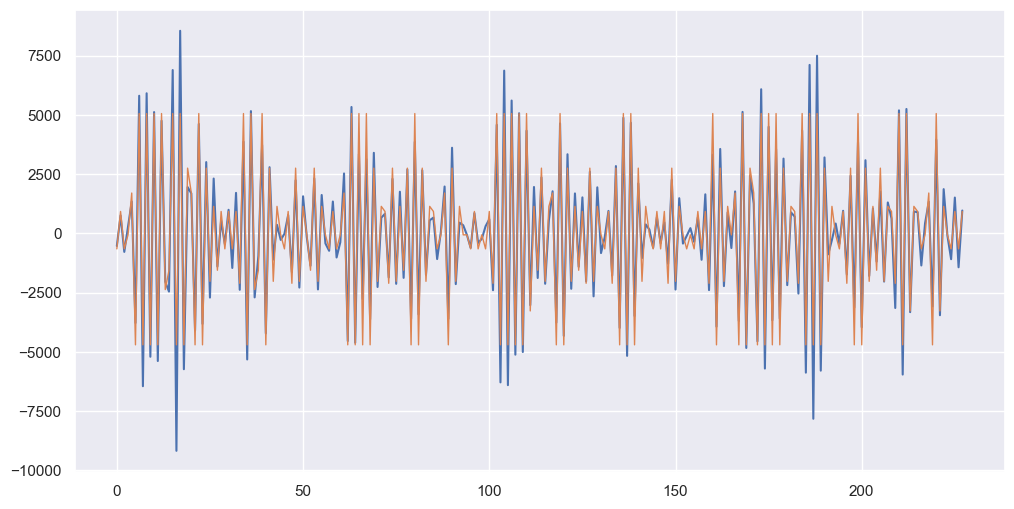

In [43]:
model = GaussianHMM(n_components=13,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=1)